<a href="https://colab.research.google.com/github/danielcorrea256/TareaIntroCC/blob/main/TareaAlgoritmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerias para graficar y crear ejemplos
import matplotlib.pyplot as plt
import numpy as np

# 1 Dimension

### 1. Describa un algoritmo para determinar las 2-medias óptimas de un conjunto de n datos en $\mathbb{R}^1$


La idea general del algoritmo es

1. Inicializar dos arreglos en $O(n)$ para que contengan una informacion para despues consultar en $O(1)$

$$preffix[i] = \sum_{k = 0}^{i - 1} data[k]$$
$$preffix\_squared[i] = \sum_{k = 0}^{i - 1} data[k]^2$$

Para ello, se crea la funcion `initialize_preffix_sums`, que crea los arreglos iterando de 0 hasta n, lo cual le toma $O(n)$ operaciones

In [ ]:
preffix = []          # Variable Global
preffix_squared = []  # Variable Global

def initialize_preffix_sums(data):
  preffix.clear()
  preffix_squared.clear()

  n = len(data)

  # Vuelve los arreglos a que tengan n+1 0's
  for i in range(n + 1):
    preffix.append(0)
    preffix_squared.append(0)

  # Construye los valores de los arreglos iterativamente
  for i in range(n):
    preffix[i + 1] = preffix[i] + data[i]
    preffix_squared[i+1] = preffix_squared[i] + (data[i])**2

2. Mirar por cada $i$ posible, sumar los costos del problema con $k=1$ de $data[0:i]$ y $data[i + 1: n - 1]$

El costo en $\mathbb{R}^1$ de la particion $data[l:r]$ con $k=1$, seria la distancia al cuadrado de cada punto con respecto el centroide de todos los puntos, por el lema visto en clase  
$$\sum_{i = l}^{r} (data[i] - c_1)^2 $$
Note que esto es igual a
$$= \sum_{i = l}^{r} data[i]^2 - 2data[i]c_1 + c_1^2$$
$$ =\sum_{i = l}^{r} data[i]^2 - \sum_{i = l}^{r} 2data[i]c_1 + \sum_{i = l}^{r} c_1^2$$
$$ =\sum_{i = l}^{r} data[i]^2 - 2c_1\sum_{i = l}^{r} data[i] + (r - l + 1)c_1^2$$

Y lo podemos definir en terminos de `preffix` y `preffix_squared`

$$ = (preffix\_squared[r + 1] - preffix\_squared[l]) - 2c_1(preffix[r + 1] - preffix[l])  + (r - l + 1)c_1^2$$

Por lo que definimos la siguiente funcion `get_cost`, como esta en terminos de `preffix` y `preffix_squared`, toma $O(1)$ de operaciones

In [ ]:
def get_cost(data, l, r):
  # Calcula el centroide como el promedio de los puntos
  center = (preffix[r + 1] - preffix[l]) / (r - l + 1)

  # Aplica la formula que se derivo anteriormente
  total_cost = (preffix_squared[r + 1] - preffix_squared[l]) - (2 * center * (preffix[r + 1] - preffix[l])) + ((r - l + 1) * center**2)
  return total_cost, center

Concluyendo con la siguiente funcion

Que hace lo siguiente

1. Inicializa las variables `preffix` y `preffix\_squared` con la funcion `initialize_preffix_sums`

2. Iteramos $i$ de $0$ hasta $n-1$ para en cada iteracion, considerar el costo que generaria partir los 2 grupos en $data[0:i]$ y $data[i+1: n - 1]$

In [ ]:
def get_centers_k2(data):

  #Inicializa los arreglos de prefijo, utiles para despues calcular los costos en O(1)
  initialize_preffix_sums(data) # O(n)

  min_cost = np.inf # O(1)
  n = len(data) # O(n)

  best_centers = [0, 0]

  # Itera para calcular todas las formas de hacer una cortadura del arreglo data
  for i in range(0, n - 1): # O(n)
    cost1, center1 = get_cost(data, 0, i) # Calcula el centro optimo y el costo respectiv en O(1) para data[0:i]
    cost2, center2 = get_cost(data, i+1, n - 1)

  # Actualize la respuesta si la forma de partir el arreglo que estamos considerando lleva a una mejor respuesta
    if cost1 + cost2 < min_cost:
      min_cost = cost1 + cost2
      best_centers = [center1, center2]

  return min_cost, best_centers

Considerando que la funcion `initialize_preffix_sums` toma $O(n)$ y `get_cost` toma $O(1)$ operaciones

Se concluye entonces que la complejidad del algoritmo es
$O(n)$

Ejecutando la siguiente celda podemos crear y graficar ejemplos

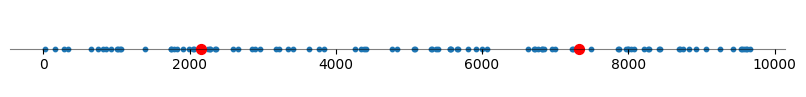

centers:  2157.2558139534885 7325.333333333333
cost:  189530802.85271347


In [ ]:
n = 10**2

data = np.random.randint(10**4, size=n)
data.sort()

cost, centers = get_centers_k2(data)

# Codigo para graficar
fig, ax = plt.subplots(figsize=(10,1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_alpha(0.5)
ax.get_yaxis().set_visible(False)
ax.scatter(data, [0 for _ in range(n)], s=10)
ax.scatter(centers, [0 for _ in range(k)], color = 'red', s=50)
plt.show()
print("centers: ", *centers)
print("cost: ", cost)

## Resuelva el problema correspondiente para k = 3 en $\mathbb{R}^1$ en tiempo cuadrático ($O(n^2$)), y generalice a cualquier $k$

Para el problema con $k=3$ vamos a de nuevo ver formas de partir el arreglo en 2 pedazos, uno para tomar el centroide, y el otro para resolver el problema de $k=2$ con tal cortadura, para volver a reutilizar los arreglos de prefijo, debemos modificar el algoritmo de k2 para que trabaje con los indices de la cortadura

In [ ]:
def get_centers_k2_modified(data, l, r):
  initialize_preffix_sums(data) # O(n)

  min_cost = np.inf # O(1)
  n = r - l

  best_centers = [0, 0]
  for i in range(0, n - 1): # O(n)
    cost1, center1 = get_cost(data, l, l + i) # O(1)
    cost2, center2 = get_cost(data, l + i + 1, r - 1) # O(1)

    if cost1 + cost2 < min_cost:
      min_cost = cost1 + cost2
      best_centers = [center1, center2]

  return min_cost, best_centers

Ahora podemos resolver el problema de hallar solucion para el problema de $k=2$ con $data[l:r]$, y usarlo para resolver el problema de $k=3$

1. Inicializa los arreglos de prefijo, esto para calcular los costos en $O(1)$ despues

2. Itera $i$ de $0$ hasta $n-3$, creando dos grupos $data[0:i]$, y $data[i+1:n - 1]$, y a este ultimo se resuelve el problema de k2

In [ ]:
def get_centers_k3(data):

  # Inicialize los arreglos de prefijo
  initialize_preffix_sums(data) # O(n)

  n = len(data) # O(n)
  min_cost = np.inf

  best_centers = [0, 0, 0]

  # Itere sobre i para luego crear 2 grupos
  for i in range(0, n - 2): # O(n)

    # Calcula el centro optimo y el costo respectiv en O(1) para data[0:i]
    cost1, center1 = get_cost(data, 0, i) # O(1)

    # Centros y costo respectivo del problema k2 para data[i+1:n-1]
    cost2, centers2 = get_centers_k2_modified(data, i+1, n) # O(n)

    if cost1 + cost2 < min_cost:
      min_cost = cost1 + cost2

      # concatena los centros que resultaron de data[i+1:n] con el centro de data[0:i]
      best_centers = [center1] + centers2

  return min_cost, best_centers

Como dentro for se itera $O(n)$ veces y se ejecuta `get_centers_k2_modified` que toma $O(n)$ operaciones, el tiempo de ejecucion del algoritmo es $O(n^2)$

Ejecutando la siguiente celda podemos crear y graficar ejemplos


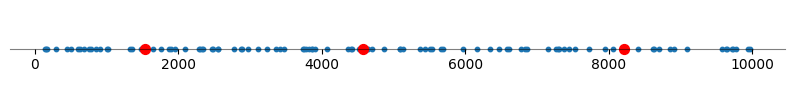

centers:  1532.4722222222222 4575.212121212121 8210.387096774193
cost:  96643143.84221269


In [ ]:
n = 10**2

data = np.random.randint(10**4, size=n)
data.sort()

cost, centers = get_centers_k3(data)

# Codigo para graficar
fig, ax = plt.subplots(figsize=(10,1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_alpha(0.5)
ax.get_yaxis().set_visible(False)
ax.scatter(data, [0 for _ in range(n)], s=10)
ax.scatter(centers, [0, 0, 0], color = 'red', s=50)
plt.show()
print("centers: ", *centers)
print("cost: ", cost)

### Generalizar para cualquier $k$ en tiempo $O(n^{k-1})$

Utilizando la idea de que los grupos terminan siendo terminos adjacentes, podemos generalizar de que para el problema con $k$ general

- Si $k=1$, entonces se toma el centroide como centro
- En otro caso, se itera por todas las formas de partir $data$ en 2 pedazos, uno resolviendo el problema con $k'=1$, y el otro con $k' = k - 1$

Por lo que esta logica recursiva se ve plasmada en la siguiente funcion

In [ ]:
def get_centers_indexes(data, k, l, r):
  n = r - l

  # Caso base
  if k == 1:
    cost, center = get_cost(data, l, r - 1)
    return cost, [center]
  #Caso inductivo
  else:

    # Inicializar variables
    min_cost = np.inf
    best_centers = [0 for _ in range(k)]

    for i in range(0, n - k + 1):
      # el n - k + 1 es para tener siempre la longitud del subarreglo al que vamos a resolver el problema de k-1 mayor o igual a k-1

      # Resolver el problema para k' = 1
      cost1, center1 = get_cost(data, l, l + i)

      # Resolver el problema para k' = k - 1
      cost2, centers2 = get_centers_indexes(data, k - 1, l + i + 1, r)

      # Actualizar respuesta si actual particion lleva a mejor respuesta
      if cost1 + cost2 < min_cost:
        min_cost = cost1 + cost2
        best_centers = [center1] + centers2

    return min_cost, best_centers

La funcion anterior requiere de iniciar con indices y tener los arreglos de prefijos ya listos


Por eso, la siguiente funcion envuelve esto y la anterior logica para solucionar el problema para k general

In [ ]:
def get_centers(data, k):
  n = len(data)
  initialize_preffix_sums(data)

  return get_centers_indexes(data, k, 0, n)

Ejecutando la siguiente celda podemos crear y graficar ejemplos para $n \geq k$

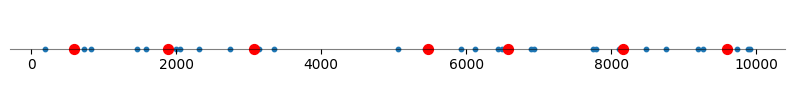

centers:  584.0 1883.0 3078.0 5472.0 6577.0 8165.833333333333 9599.0
cost:  3003494.833333373


In [ ]:
n = 30
k = 7

data = np.random.randint(10**4, size=n)
data.sort()

cost, centers = get_centers(data, k)

# Codigo para graficar
fig, ax = plt.subplots(figsize=(10,1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_alpha(0.5)
ax.get_yaxis().set_visible(False)
ax.scatter(data, [0 for _ in range(n)], s=10)
ax.scatter(centers, [0 for _ in range(k)], color = 'red', s=50)
plt.show()
print("centers: ", *centers)
print("cost: ", cost)